In [1]:
    import importnb
    with importnb.Notebook():
        try: 
            from .schemas import List, Dict
            from .strings import Uri, String
        except: 
            from schemas import List, Dict
            from strings import Uri, String


In [2]:
    class ListofList(List, additionalProperties=List.__schema__): ...
    class ListofDict(List, additionalProperties=Dict.__schema__): ...

In [3]:
    class ListofUri(List, items=Uri.__schema__, minItems=1): 
        def text(x): return aiorun(x.gather(json=False))
        def json(x): return aiorun(x.gather())
        
        async def one(self, session, url, json=True):
            async with session.get(url) as response: return await response.json() if json else response.text()
            
        async def gather(x, json=True):
            async with __import__('aiohttp').ClientSession() as session: return await __import__('asyncio').gather(*(x.one(session, _, json) for _ in x))
    def aiorun(object):
        try: return __import__('asyncio').run(object)
        except RuntimeError as e:
            if 'nest_asyncio' not in sys.modules: __import__('nest_asyncio').apply(); return aiorun(object)
            else: raise e


In [5]:
    class Test(__import__('unittest').TestCase):
        def test_instances(x): ...

In [6]:
    def load_tests(loader, tests, ignore): tests.addTests(doctest.DocTestSuite(importlib.import_module(__name__), optionflags=doctest.ELLIPSIS)); return tests
    if __name__ == '__main__': 
        import unittest, pytest, jsonschema, importlib, doctest
        unittest.main(argv=' ', exit=False, verbosity=1)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


[NbConvertApp] Converting notebook lists.ipynb to script
[NbConvertApp] Writing 1929 bytes to lists.py
reformatted lists.py
All done! ✨ 🍰 ✨
1 file reformatted.
parsing /Users/tonyfast/xxxxx/tonyfast/jschema/lists.py...


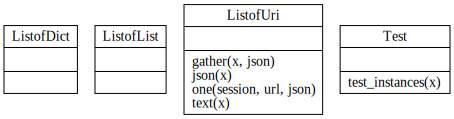

In [11]:
    if __name__ == '__main__': 
        !jupyter nbconvert --to script lists.ipynb
        !black lists.py
        !pyreverse lists -osvg -plists
        display(__import__('IPython').display.SVG('classes_lists.svg'))        
        !rm classes_lists.svg lists.py